In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

%matplotlib inline

## Imprort and review data

In [6]:
train_data = pd.read_csv('/data/share/lab04data/lab04_train.csv')
test_data = pd.read_csv('/data/share/lab04data/lab04_test.csv')
train_data.shape, test_data.shape

((320764, 117), (44399, 116))

In [7]:
# review information on data, pay attention to missing values and dtypes
train_data.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320764 entries, 0 to 320763
Data columns (total 117 columns):
Unnamed: 0                     320764 non-null int64
ID                             320764 non-null int64
CR_PROD_CNT_IL                 320764 non-null int64
AMOUNT_RUB_CLO_PRC             286214 non-null float64
PRC_ACCEPTS_A_EMAIL_LINK       139950 non-null float64
APP_REGISTR_RGN_CODE           54850 non-null float64
PRC_ACCEPTS_A_POS              139950 non-null float64
PRC_ACCEPTS_A_TK               139950 non-null float64
TURNOVER_DYNAMIC_IL_1M         320763 non-null float64
CNT_TRAN_AUT_TENDENCY1M        69535 non-null float64
SUM_TRAN_AUT_TENDENCY1M        69535 non-null float64
AMOUNT_RUB_SUP_PRC             286213 non-null float64
PRC_ACCEPTS_A_AMOBILE          139950 non-null float64
SUM_TRAN_AUT_TENDENCY3M        100204 non-null float64
CLNT_TRUST_RELATION            62935 non-null object
PRC_ACCEPTS_TK                 139950 non-null float64
PRC_ACCEPTS_A_MTP  

In [8]:
train_data.tail(10)

,Unnamed: 0,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
320754,83534,230375,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
320755,228984,375825,0,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
320756,367774,514615,1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
320757,193334,340175,1,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.132616,0.132616,0.0,0.0,0.064516,0.064516,0.064516,0.0
320758,13300,160141,0,0.000000,NaN,NaN,NaN,NaN,0.0,0.125,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
320759,351454,498295,0,0.000000,NaN,42.0,NaN,NaN,0.0,NaN,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
320760,421102,567943,0,0.143985,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
320761,360104,506945,0,0.043560,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
320762,180350,327191,0,0.007867,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
320763,222683,369524,0,0.019900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop the last row in the train data which has no target label
train_data.drop(index=[320763], inplace=True)
train_data.shape

(320763, 117)

### _Quickly drop weak features_

In [110]:
# exclude data of weak correlation with target and with many missing values
def clean_data(data):
    list_del = ['Unnamed: 0', 'ID', 'PACK']
    for col in data.columns:
        if len(data[col].unique())<2 or data[col].isnull().sum()!=0:
            list_del.append(col)
    return data.drop(list_del, axis=1)

In [111]:
train_features = clean_data(train_data).drop(columns='TARGET')
train_target = train_data['TARGET']
test_features = clean_data(test_data)

train_features.shape, train_target.shape, test_features.shape

((320763, 32), (320763,), (44399, 32))

In [112]:
train_features.head(20)

,CR_PROD_CNT_IL,TURNOVER_DYNAMIC_IL_1M,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,TURNOVER_CC,TURNOVER_PAYM,...,TURNOVER_DYNAMIC_IL_3M,REST_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M
0,0,0.0,0.0,0.0000,0.0,1.906969e+04,1.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.303750,5.480001,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0000,0.0,5.951209e+03,1.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.504160,6.786453,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0000,0.0,3.774583e+03,1.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.351398,8.528388,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0000,0.0,1.485683e+05,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,3.291829,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0000,0.0,6.923339e+04,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.735125,5.160219,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0,0.0,0.0,0.0000,0.0,2.182862e+05,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.266559,7.574206,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0,0.0,0.0,0.0000,0.0,2.245738e+04,1.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.630066,7.146779,0.000000,0.000000,0.0,0.0,0.0,0.0
7,1,0.0,0.0,0.0000,0.0,5.746468e+04,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.572337,3.652163,0.000000,0.000000,0.0,0.0,0.0,0.0
8,3,0.0,0.0,0.4878,1.0,3.994592e+02,2.0,0.0,0.0,0.000000,...,0.003443,0.000000,0.781770,9.947854,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0,0.0,0.0,0.0000,0.0,1.274584e+06,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.583824,10.377961,0.000000,0.000000,0.0,0.0,0.0,0.0


In [13]:
train_features.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320763 entries, 0 to 320762
Data columns (total 33 columns):
Unnamed: 0                  320763 non-null int64
CR_PROD_CNT_IL              320763 non-null int64
TURNOVER_DYNAMIC_IL_1M      320763 non-null float64
REST_DYNAMIC_FDEP_1M        320763 non-null float64
REST_DYNAMIC_SAVE_3M        320763 non-null float64
CR_PROD_CNT_VCU             320763 non-null float64
REST_AVG_CUR                320763 non-null float64
CR_PROD_CNT_TOVR            320763 non-null float64
CR_PROD_CNT_PIL             320763 non-null float64
TURNOVER_CC                 320763 non-null float64
TURNOVER_PAYM               320763 non-null float64
AGE                         320763 non-null float64
CR_PROD_CNT_CC              320763 non-null float64
REST_DYNAMIC_FDEP_3M        320763 non-null float64
REST_DYNAMIC_IL_1M          320763 non-null float64
CR_PROD_CNT_CCFP            320763 non-null float64
REST_DYNAMIC_CUR_1M         320763 non-null float64
REST_AVG_

In [113]:
train_features.describe()

,CR_PROD_CNT_IL,TURNOVER_DYNAMIC_IL_1M,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,TURNOVER_CC,TURNOVER_PAYM,...,TURNOVER_DYNAMIC_IL_3M,REST_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M
count,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,3.207630e+05,320763.000000,320763.000000,3.207630e+05,3.207630e+05,...,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000,320763.000000
mean,0.105551,0.001312,0.000720,0.063789,0.031481,6.616230e+04,0.310245,0.057133,5.011494e+02,1.457711e+04,...,0.004064,0.027698,0.484424,4.377489,0.072124,0.025178,0.002243,0.000957,0.007414,0.004452
std,0.430364,0.029057,0.014273,0.203693,0.184595,1.835636e+05,0.589397,0.297015,1.288004e+04,1.495004e+05,...,0.053342,0.097209,0.331702,2.936243,0.207083,0.104618,0.026872,0.028629,0.067032,0.060917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.345592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.040222e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.217069,1.781076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.623043e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.494318,3.902163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,5.669653e+04,1.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.726228,6.555388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,1.000000,1.000000,1.000000,4.000000,2.202141e+07,13.000000,9.000000,3.753042e+06,4.628044e+07,...,1.000000,1.000000,1.000000,13.748937,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
train_target.describe()

count    320763.000000
mean          0.081543
std           0.273668
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

In [118]:
corr_with_target = train_features.corrwith(train_target)
corr_matrix = train_features.corr()

In [352]:
corr_with_target   #.sort_values(ascending=False)

CR_PROD_CNT_IL              0.012684
TURNOVER_DYNAMIC_IL_1M      0.021600
REST_DYNAMIC_FDEP_1M        0.021245
REST_DYNAMIC_SAVE_3M        0.015354
CR_PROD_CNT_VCU             0.004849
REST_AVG_CUR               -0.076699
CR_PROD_CNT_TOVR           -0.028929
CR_PROD_CNT_PIL             0.014446
TURNOVER_CC                -0.001596
TURNOVER_PAYM               0.003479
AGE                        -0.042343
CR_PROD_CNT_CC             -0.012857
REST_DYNAMIC_FDEP_3M        0.024177
REST_DYNAMIC_IL_1M          0.004560
CR_PROD_CNT_CCFP            0.008089
REST_DYNAMIC_CUR_1M         0.020766
REST_AVG_PAYM              -0.014047
LDEAL_GRACE_DAYS_PCT_MED   -0.002333
REST_DYNAMIC_CUR_3M        -0.007191
TURNOVER_DYNAMIC_CUR_1M     0.058956
REST_DYNAMIC_PAYM_3M        0.051505
REST_DYNAMIC_IL_3M          0.002841
TURNOVER_DYNAMIC_IL_3M      0.022084
REST_DYNAMIC_PAYM_1M        0.035982
TURNOVER_DYNAMIC_CUR_3M     0.022288
CLNT_SETUP_TENOR           -0.082201
TURNOVER_DYNAMIC_PAYM_3M    0.067117
T

In [105]:
corr_matrix

,Unnamed: 0,CR_PROD_CNT_IL,TURNOVER_DYNAMIC_IL_1M,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,TURNOVER_CC,...,TURNOVER_DYNAMIC_IL_3M,REST_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M
Unnamed: 0,1.000000,0.000338,0.000934,0.005347,-0.001997,0.001099,-0.002430,-0.005598,-0.000516,-0.001786,...,0.002684,0.006073,0.041335,-0.025195,0.016758,0.005273,-0.005155,-0.000768,-0.003953,0.000211
CR_PROD_CNT_IL,0.000338,1.000000,0.133120,-0.000857,0.007840,0.581114,-0.034271,0.035557,0.117378,0.011444,...,0.234984,-0.003002,0.011287,0.129491,-0.002926,-0.005982,0.054632,0.028459,0.076434,0.059352
TURNOVER_DYNAMIC_IL_1M,0.000934,0.133120,1.000000,-0.002163,-0.005212,0.051658,-0.012201,-0.007925,0.045002,0.004252,...,0.683861,0.003066,0.030132,0.000226,0.006155,0.017184,0.005092,0.020627,0.006099,0.014723
REST_DYNAMIC_FDEP_1M,0.005347,-0.000857,-0.002163,1.000000,0.005677,-0.001883,-0.001228,-0.008129,0.004898,-0.001128,...,-0.001412,0.017873,0.040672,-0.002748,0.012542,0.024547,0.000457,0.000721,0.001072,-0.000383
REST_DYNAMIC_SAVE_3M,-0.001997,0.007840,-0.005212,0.005677,1.000000,0.004265,-0.022887,0.039300,0.013366,0.007947,...,-0.002533,-0.006722,0.055271,0.012431,-0.001234,-0.002494,0.010910,0.002762,0.015448,0.007767
CR_PROD_CNT_VCU,0.001099,0.581114,0.051658,-0.001883,0.004265,1.000000,-0.020020,0.025822,0.074948,0.007163,...,0.084538,-0.006392,0.010708,0.112469,-0.007618,-0.007187,0.075405,0.036838,0.103264,0.069381
REST_AVG_CUR,-0.002430,-0.034271,-0.012201,-0.001228,-0.022887,-0.020020,1.000000,0.011602,-0.026383,-0.000284,...,-0.018019,-0.083100,-0.011407,0.085813,-0.099569,-0.070585,-0.006226,-0.006029,-0.008681,-0.006961
CR_PROD_CNT_TOVR,-0.005598,0.035557,-0.007925,-0.008129,0.039300,0.025822,0.011602,1.000000,0.087110,0.045073,...,-0.008715,-0.050978,-0.003914,0.380862,-0.056037,-0.035403,0.054146,0.018452,0.069740,0.037913
CR_PROD_CNT_PIL,-0.000516,0.117378,0.045002,0.004898,0.013366,0.074948,-0.026383,0.087110,1.000000,0.035695,...,0.063022,0.062403,-0.074474,0.163448,0.089569,0.065481,0.059510,0.033396,0.075497,0.056502
TURNOVER_CC,-0.001786,0.011444,0.004252,-0.001128,0.007947,0.007163,-0.000284,0.045073,0.035695,1.000000,...,0.011926,0.002477,-0.004765,0.017616,0.002507,0.003541,0.132341,0.034979,0.195058,0.130717


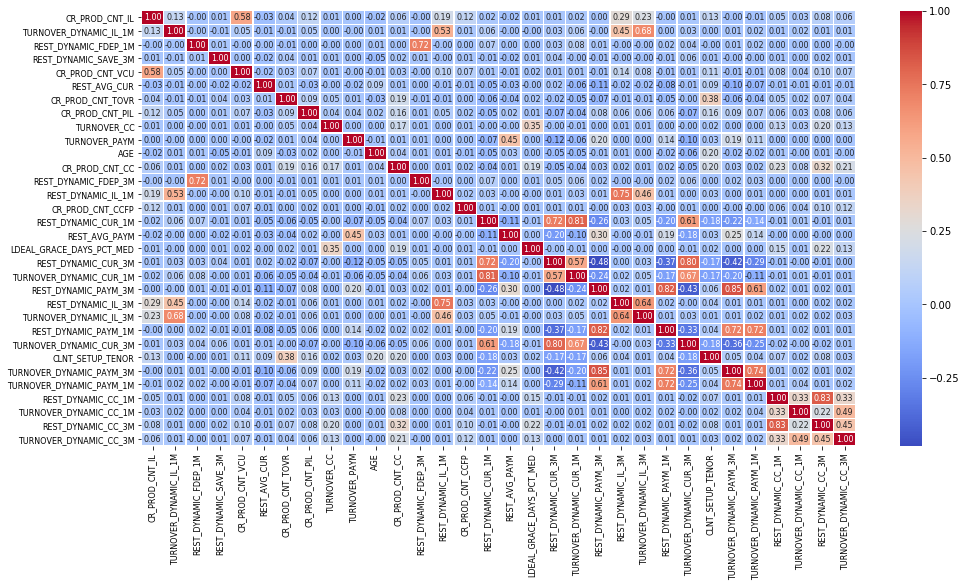

In [119]:
# Let's also draw a heatmap visualization of the correlation matrix
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 8}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### _Create training, validation and test sets_

In [121]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train, X_val, y_train, y_val = train_test_split(scaler.fit_transform(train_features), train_target, test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((224534, 32), (96229, 32), (224534,), (96229,))

In [122]:
X_test = scaler.transform(test_features)
X_test.shape

(44399, 32)

In [355]:
scaled_train_features = pd.DataFrame(X_train, columns=train_features.columns)
scaled_val_features = pd.DataFrame(X_val, columns=train_features.columns)
scaled_train_features.describe()

,CR_PROD_CNT_IL,TURNOVER_DYNAMIC_IL_1M,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,TURNOVER_CC,TURNOVER_PAYM,...,TURNOVER_DYNAMIC_IL_3M,REST_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M
count,224534.000000,224534.000000,224534.000000,224534.000000,224534.000000,224534.000000,224534.000000,224534.000000,224534.000000,224534.000000,...,224534.000000,224534.000000,224534.000000,224534.000000,224534.000000,224534.000000,224534.000000,224534.000000,224534.000000,224534.000000
mean,0.009569,0.001276,0.000722,0.063585,0.007899,0.002995,0.023884,0.006274,0.000131,0.000315,...,0.004016,0.027810,0.484160,0.300648,0.072205,0.025249,0.002227,0.000971,0.007346,0.004465
std,0.038851,0.028769,0.014757,0.203426,0.046242,0.008126,0.045381,0.032838,0.003533,0.003065,...,0.052839,0.097803,0.331750,0.218923,0.207131,0.104832,0.026884,0.028918,0.066537,0.061214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000184,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.216118,0.107107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000737,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.493998,0.264748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.002577,0.076923,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.725796,0.463101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.982197,0.769231,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train models

### _Logistic Regression_

In [124]:
from sklearn.linear_model import LogisticRegression

In [168]:
# Train a Logistic regresson model 
clf1 = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=500, n_jobs=-1, class_weight='balanced', verbose=1)
%time clf1.fit(X_train, y_train)

convergence after 36 epochs took 6 seconds
CPU times: user 5.45 s, sys: 64 ms, total: 5.51 s
Wall time: 5.55 s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.5s finished


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=500,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='saga', tol=0.0001, verbose=1, warm_start=False)

In [169]:
y_hat1 = clf1.predict_proba(X_val)[:,1]
y_hat1.shape

(96229,)

In [170]:
y_hat3[:20]

array([0.45190206, 0.32013017, 0.2633178 , 0.5623859 , 0.3074171 ,
       0.49308202, 0.65724045, 0.43773797, 0.07694943, 0.79257566,
       0.444571  , 0.5042225 , 0.19781962, 0.22524048, 0.6362773 ,
       0.31285518, 0.12190063, 0.17132781, 0.43004388, 0.43872684],
      dtype=float32)

In [171]:
roc_auc_score(y_val, y_hat1)

0.680849875554967

### _XGBoost_

In [255]:
import xgboost as xgb

In [353]:
clf2 = xgb.XGBRegressor(n_estimators=400, learning_rate=0.1, nthread=-1, max_depth=6, \
                        objective='binary:logistic', eval_metric='auc')

%time clf2.fit(scaled_train_features, y_train)

CPU times: user 6min 38s, sys: 3min 42s, total: 10min 20s
Wall time: 22.2 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='auc', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=400, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [356]:
y_hat2 = clf2.predict(scaled_val_features)
y_hat2.shape

(96229,)

In [357]:
y_hat2[:20]

array([0.05283002, 0.01466855, 0.00257141, 0.01153369, 0.01662561,
       0.02143498, 0.08858107, 0.06112854, 0.00072029, 0.1433934 ,
       0.06484541, 0.01644032, 0.1305547 , 0.00419836, 0.12439843,
       0.02361226, 0.00180873, 0.00132059, 0.0165891 , 0.282622  ],
      dtype=float32)

In [358]:
roc_auc_score(y_val, y_hat2)

0.8324345403212787

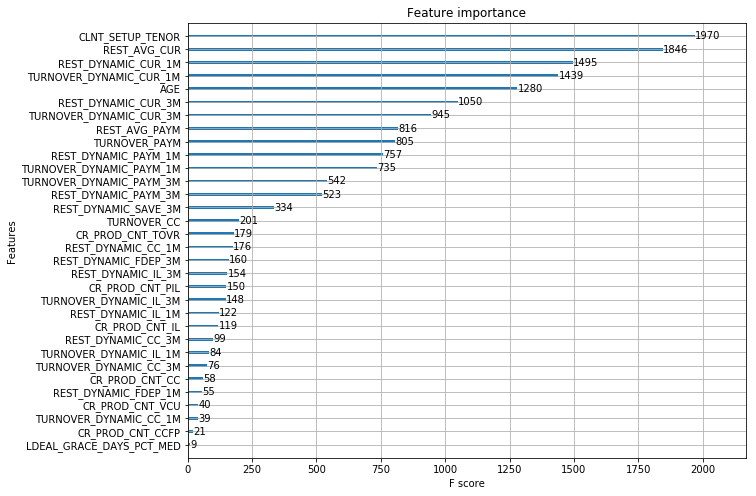

In [359]:
xgb.plot_importance(clf2)
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

### _Neural Network_

In [225]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2
from time import time

In [360]:
# Let's make a list of CONSTANTS for modelling:
M_TRAIN = X_train.shape[0]           # number of training examples
M_TEST = X_test.shape[0]             # number of test examples
N = X_train.shape[1]                 # number of features
BATCH = 256                          # batch size
EPOCH = 50                           # number of epochs
LR = 1e-4                            # learning rate of the gradient descent
LAMBD = 0                         # lambda in L2 regularizaion

In [361]:
# create an instance of a neural network:
clf3 = Sequential()
# the first hidden layer must have input dimensions:
clf3.add(Dense(32, activation='relu', kernel_regularizer=l2(LAMBD), input_dim=N))
clf3.add(Dropout(0.25))
clf3.add(Dense(32, activation='relu', kernel_regularizer=l2(LAMBD)))
clf3.add(Dropout(0.25))
# the output layer- a binary classifier w/sigmoid activation:
clf3.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer:
clf3.compile(optimizer=Adam(lr=LR), loss='binary_crossentropy', metrics=['accuracy'])

# Define a learning rate decay method:
lr_decay = ReduceLROnPlateau(monitor='loss',
                             patience=1,
                             verbose=1,
                             factor=0.5,
                             min_lr=1e-8)
# Train the model:
%time History = clf3.fit(X_train, y_train, \
                         epochs=EPOCH, batch_size=BATCH, \
                         validation_data = (X_val, y_val), \
                         class_weight={0:1., 1:10.}, shuffle=True, \
                         callbacks=[lr_decay], verbose=0)


Epoch 00038: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 00039: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.

Epoch 00040: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.

Epoch 00041: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-06.

Epoch 00042: ReduceLROnPlateau reducing learning rate to 3.12499992105586e-06.

Epoch 00043: ReduceLROnPlateau reducing learning rate to 1.56249996052793e-06.

Epoch 00044: ReduceLROnPlateau reducing learning rate to 7.81249980263965e-07.

Epoch 00045: ReduceLROnPlateau reducing learning rate to 3.906249901319825e-07.

Epoch 00047: ReduceLROnPlateau reducing learning rate to 1.9531249506599124e-07.

Epoch 00048: ReduceLROnPlateau reducing learning rate to 9.765624753299562e-08.

Epoch 00049: ReduceLROnPlateau reducing learning rate to 4.882812376649781e-08.

Epoch 00050: ReduceLROnPlateau reducing learning rate to 2.4414061883248905e-08.
CPU times: user 2h 46min 44s, 

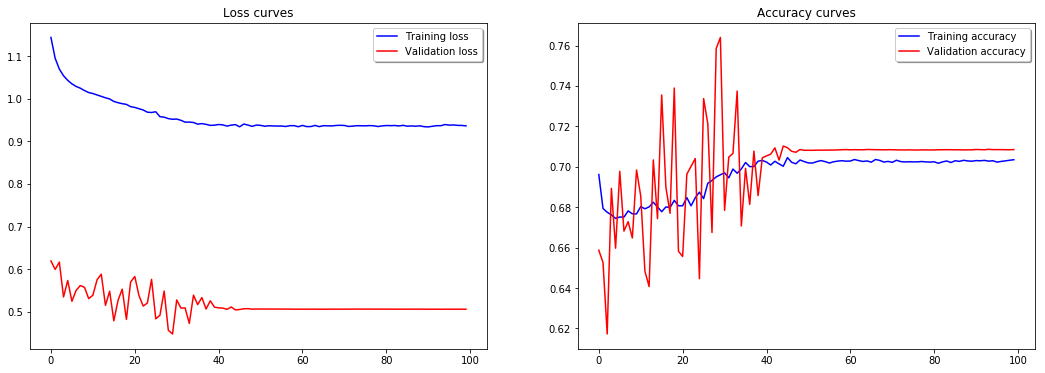

In [250]:
# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(History.history['loss'], color='b', label='Training loss')
axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(History.history['acc'], color='b', label='Training accuracy')
axs[1].plot(History.history['val_acc'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()

In [251]:
%time y_hat3 = clf3.predict_proba(X_val)
y_hat3 = np.squeeze(y_hat3)
y_hat3.shape

CPU times: user 3min 48s, sys: 8min 13s, total: 12min 1s
Wall time: 14.4 s


(96229,)

In [252]:
y_hat3[:20]

array([0.54840565, 0.12187509, 0.04053248, 0.21156481, 0.17833477,
       0.41558787, 0.6400321 , 0.45587173, 0.00254867, 0.8758424 ,
       0.4437997 , 0.24705091, 0.18410857, 0.07963334, 0.60559696,
       0.15786712, 0.04911096, 0.03474997, 0.1836039 , 0.5659415 ],
      dtype=float32)

In [253]:
roc_auc_score(y_val, y_hat3)

0.8076805825807457

### _Random Forest_

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
clf4 = RandomForestClassifier(n_estimators=200, max_features='auto', max_depth=6, class_weight=None, n_jobs=-1)
%time clf4 = clf4.fit(X_train, y_train)

CPU times: user 44.5 s, sys: 64 ms, total: 44.6 s
Wall time: 44.6 s


In [189]:
y_hat4 = clf4.predict_proba(X_val)[:,1]
y_hat4.shape

(96229,)

In [190]:
y_hat4[:20]

array([0.11462615, 0.03580873, 0.04214887, 0.0426568 , 0.03797673,
       0.07956468, 0.12922679, 0.05865682, 0.03198799, 0.14734116,
       0.05895571, 0.08573617, 0.08377125, 0.03422525, 0.11925804,
       0.04729948, 0.02869721, 0.03397942, 0.05519097, 0.13876895])

In [191]:
roc_auc_score(y_val, y_hat4)

0.7954115131137837

### _SVM_

In [232]:
from sklearn.svm import SVC

In [233]:
clf5 = SVC(C=1.0, kernel='rbf', gamma='auto')
%time clf5 = clf5.fit(X_train, y_train)

CPU times: user 17min 1s, sys: 3.17 s, total: 17min 4s
Wall time: 17min 4s


In [ ]:
y_hat5[:20]

In [ ]:
roc_auc_score(y_val, y_hat5)

### _KNN_

In [239]:
from sklearn.neighbors import KNeighborsClassifier

In [242]:
clf6 = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2, metric='minkowski', n_jobs=-1)
%time clf6 = clf6.fit(X_train, y_train)

CPU times: user 3min 15s, sys: 548 ms, total: 3min 16s
Wall time: 3min 15s


In [243]:
y_hat6 = clf6.predict_proba(X_val)[:,1]
y_hat6.shape

(96229,)

In [247]:
y_hat6[:50]

array([0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. ,
       0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0.4, 0. , 0.4,
       0. , 0. , 0.2, 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0.2, 0. , 0. , 0.4, 0.2, 0. , 0. , 0. , 0. , 0. ])

In [245]:
roc_auc_score(y_val, y_hat6)

0.6099049137468148

### _Write answer to cvs_

In [36]:
y_test = clf2.predict(X_test)
y_test.shape

(44399,)

In [37]:
df_out = pd.DataFrame()
df_out['id'] = test_data['ID']
df_out['target'] = y_test

In [38]:
df_out.head()

,id,target
0,519130,0.181915
1,234045,0.011922
2,401256,0.005856
3,551070,0.010332
4,367285,0.001993


In [39]:
df_out.to_csv('~/lab04.csv', sep='\t', index=False)

In [40]:
df_out.to_csv('~/lab04s.csv', sep='\t', index=False)

## APPENDIX

In [39]:
train_data.loc[:, ['APP_MARITAL_STATUS', 'TARGET']].groupby('APP_MARITAL_STATUS', as_index=True).mean().sort_values('TARGET', ascending=False)

,TARGET
APP_MARITAL_STATUS,
,0.153846
T,0.107094
V,0.103549
W,0.101399
M,0.092466
D,0.090841
N,0.088235
C,0.087838
v,0.076250


In [27]:
train_data.groupby('APP_EDUCATION').APP_MARITAL_STATUS.count().sort_values(ascending=False)

APP_EDUCATION
H     38499
SS     9196
UH     5671
S      2988
HH     1772
h      1677
s       569
A       476
i       349
I       182
US      170
HI       42
a        37
e        15
AC        9
E         8
AV        5
Name: APP_MARITAL_STATUS, dtype: int64